# Generating SQL for Microsoft SQL Server using Azure OpenAI, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../mssql-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../mssql-anthropic-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Anthropic</div>
        <small class="w-full">Use Anthropics Claude with your Anthropic API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-ollama-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-gemini-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Google Gemini</div>
        <small class="w-full">Use Google Gemini with your Gemini or Vertex API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../mssql-openai-azure-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../mssql-openai-azure-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Qdrant</div>
        <small class="w-full">Use Qdrants open-source vector database</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-openai-azure-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mssql-openai-azure-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
#%pip install 'vanna[chromadb,openai]'
#%pip install pysqlite3-binary
#%pip install 'vanna[marqo,openai]'
#%pip install 'marqo'

In [2]:
from vanna.openai import OpenAI_Chat
from openai import AzureOpenAI
from vanna.chromadb import ChromaDB_VectorStore
from vanna.marqo.marqo import Marqo_VectorStore
import os
from dotenv import load_dotenv

import json
import re

In [3]:
load_dotenv(override=True)


class MyVanna(ChromaDB_VectorStore, OpenAI_Chat):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        azure_client  = AzureOpenAI(
            api_key = os.getenv("OPENAI_API_KEY"),
            azure_endpoint = os.getenv("OPENAI_API_BASE"),
            api_version = os.getenv("OPENAI_API_VERSION")
        )
        OpenAI_Chat.__init__(self, client=azure_client, config=config) # Make sure to put your AzureOpenAI client 
    
    def extract_sql(self, llm_response: str) -> str:
        """
        Example:
        ```python
        vn.extract_sql("Here's the SQL query in a code block: ```sql\nSELECT * FROM customers\n```")
        ```

        Extracts the SQL query from the LLM response. This is useful in case the LLM response contains other information besides the SQL query.
        Override this function if your LLM responses need custom extraction logic.

        Args:
            llm_response (str): The LLM response.

        Returns:
            str: The extracted SQL query.
        """

        # If the llm_response contains a CTE (with clause), extract the last sql between WITH and ;
        sqls = re.findall(r"\bWITH\b .*?;", llm_response, re.DOTALL)
        if sqls:
            sql = sqls[-1]
            self.log(title="Extracted SQL", message=f"{sql}")
            return sql

        # If the llm_response is not markdown formatted, extract last sql by finding select and ; in the response
        #sqls = re.findall(r"SELECT.*?;", llm_response, re.DOTALL)
        #if sqls:
        #    sql = sqls[-1]
         #   self.log(title="Extracted SQL", message=f"{sql}")
          #  return sql

        # If the llm_response contains a markdown code block, with or without the sql tag, extract the last sql from it
        sqls = re.findall(r"```sql\n(.*)```", llm_response, re.DOTALL)
        if sqls:
            sql = sqls[-1]
            self.log(title="Extracted SQL", message=f"{sql}")
            return sql

        sqls = re.findall(r"```(.*)```", llm_response, re.DOTALL)
        if sqls:
            sql = sqls[-1]
            self.log(title="Extracted SQL", message=f"{sql}")
            return sql

        return llm_response


vn = MyVanna(config={'path': os.getenv("CHROMA_PATH") ,
                         'model': 'gpt-4o',
                         'temperature': 0.0,
                         'max_tokens': 1000,})



<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which database do you want to query?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../postgres-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Postgres</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Microsoft SQL Server</div>
        <small class="w-full"></small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../mysql-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">MySQL</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../duckdb-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">DuckDB</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../snowflake-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Snowflake</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../bigquery-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">BigQuery</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">SQLite</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../oracle-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Oracle</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../other-database-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other Database</div>
        <small class="w-full">Use Vanna to generate queries for any SQL database</small>
      </div>
    </a>
  </li>
    
</ul>
    

In [4]:
vn.connect_to_mssql(odbc_conn_str=os.getenv("SQL_CONNECTION_STRING")) # You can use the ODBC connection string here

## Training
You only need to train once. Do not train again unless you want to add more training data.

In [5]:

# The information schema query may need some tweaking depending on your database. This is a good starting point.
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")

# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)
plan

# If you like the plan, then uncomment this and run it to train
# vn.train(plan=plan)



Train on Information Schema: wspsurveydata.sys database_firewall_rules
Train on Information Schema: wspsurveydata.dbo survey_data

In [6]:

 # DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
vn.train(ddl="""
        CREATE TABLE survey_data (
                [ID] [int] IDENTITY(1,1) NOT NULL,
                [Comment] [nvarchar](4000) NULL,
                [Date] [date] NULL,
                [Question] [nvarchar](550) NULL,
                [Score] [float] NULL,
                [Group_Name] [nvarchar](550) NULL,
                [Driver_Value] [nvarchar](550) NULL,
                [Topics] [nvarchar](600) NULL,
                [Survey_Location] [nvarchar](250) NULL,
                [Labels] [nvarchar](950) NULL,
                [Sentiment] [nvarchar](650) NULL,
                [File_Name] [nvarchar](650) NULL,
            )
    """)

# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="Labels represent the main topics or themes described in the survey data. These are used to categorize the data for analysis. The labels columnm is a free-form text field that can contain multiple labels separated by semicolon.")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
vn.train(sql="SELECT * FROM survey_data WHERE Score > 5")
vn.train(documentation="""
            Follow these Instructions for creating syntactically correct SQL query:
            - In your reply only provide the SQL query with no extra formatting.
            - To avoid issues with apostrophes, when referring to labels, always use double-quotes, for instance:
            SELECT SUM(Scores) FROM survey_data WHERE Score = "9" AND Labels LIKE "Projectc'S Issue"
            - When asked about topics or themes use column Labels
            - Make sure to split labels by semicolon to provide separate topics (CROSS APPLY STRING_SPLIT(Labels, ';'). Filter out empty topic responses. 
            - **MUST** Double check SQL
            """)
vn.train(sql="""
                SELECT
                value AS Topic,
                COUNT(*) AS TopicCount
                    FROM
                    survey_data
                    CROSS APPLY
                    STRING_SPLIT(Labels, ";")
                    WHERE
                    value <> ""
                    GROUP BY
                    value
                    ORDER BY
                    TopicCount DESC;
             """)


Adding ddl: 
       CREATE TABLE survey_data (
               [ID] [int] IDENTITY(1,1) NOT NULL,
               [Comment] [nvarchar](4000) NULL,
               [Date] [date] NULL,
               [Question] [nvarchar](550) NULL,
               [Score] [float] NULL,
               [Group_Name] [nvarchar](550) NULL,
               [Driver_Value] [nvarchar](550) NULL,
               [Topics] [nvarchar](600) NULL,
               [Survey_Location] [nvarchar](250) NULL,
               [Labels] [nvarchar](950) NULL,
               [Sentiment] [nvarchar](650) NULL,
               [File_Name] [nvarchar](650) NULL,
           )
   


Add of existing embedding ID: 2c93565d-c936-5d25-b495-4057bbb8e12d-ddl
Insert of existing embedding ID: 2c93565d-c936-5d25-b495-4057bbb8e12d-ddl
Insert of existing embedding ID: fb84321f-5f87-55be-8c27-7cb81509ee3c-doc
Add of existing embedding ID: fb84321f-5f87-55be-8c27-7cb81509ee3c-doc


Adding documentation....
Using model gpt-4o for 63.75 tokens (approx)
Question generated with sql: What are the details of the survey responses that have a score greater than 5? 
Adding SQL...


Insert of existing embedding ID: a3e4755b-3d78-5c1d-aaa6-9a9b66d05124-doc
Add of existing embedding ID: a3e4755b-3d78-5c1d-aaa6-9a9b66d05124-doc


Adding documentation....
Using model gpt-4o for 155.5 tokens (approx)


Insert of existing embedding ID: bfbd5562-2003-5a06-8ce7-8f3548464624-sql
Add of existing embedding ID: bfbd5562-2003-5a06-8ce7-8f3548464624-sql


Question generated with sql: What are the most frequently mentioned topics in the survey responses? 
Adding SQL...


'bfbd5562-2003-5a06-8ce7-8f3548464624-sql'

In [7]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,88754d54-9eef-5db6-b091-dad6c4250efe-sql,What are the details of the survey responses t...,SELECT * FROM survey_data WHERE Score > 5,sql
1,b9c7e794-b809-502a-8fc0-992e8529efbd-sql,Which survey responses have a score greater th...,SELECT * FROM survey_data WHERE Score > 5,sql
2,bfbd5562-2003-5a06-8ce7-8f3548464624-sql,What are the most frequently mentioned topics ...,\n SELECT\n value ...,sql
0,2c93565d-c936-5d25-b495-4057bbb8e12d-ddl,None,\n CREATE TABLE survey_data (\n ...,ddl
0,a3e4755b-3d78-5c1d-aaa6-9a9b66d05124-doc,None,\n Follow these Instructions for cre...,documentation
1,fb84321f-5f87-55be-8c27-7cb81509ee3c-doc,None,Labels represent the main topics or themes des...,documentation


In [8]:
# You can remove training data if there's obsolete/incorrect information. 
#vn.remove_training_data(id='1-ddl')


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 778.75 tokens (approx)
SELECT COUNT(DISTINCT Survey_Location) AS RegionCount FROM survey_data
   RegionCount
0           15
Using model gpt-4o for 168.75 tokens (approx)


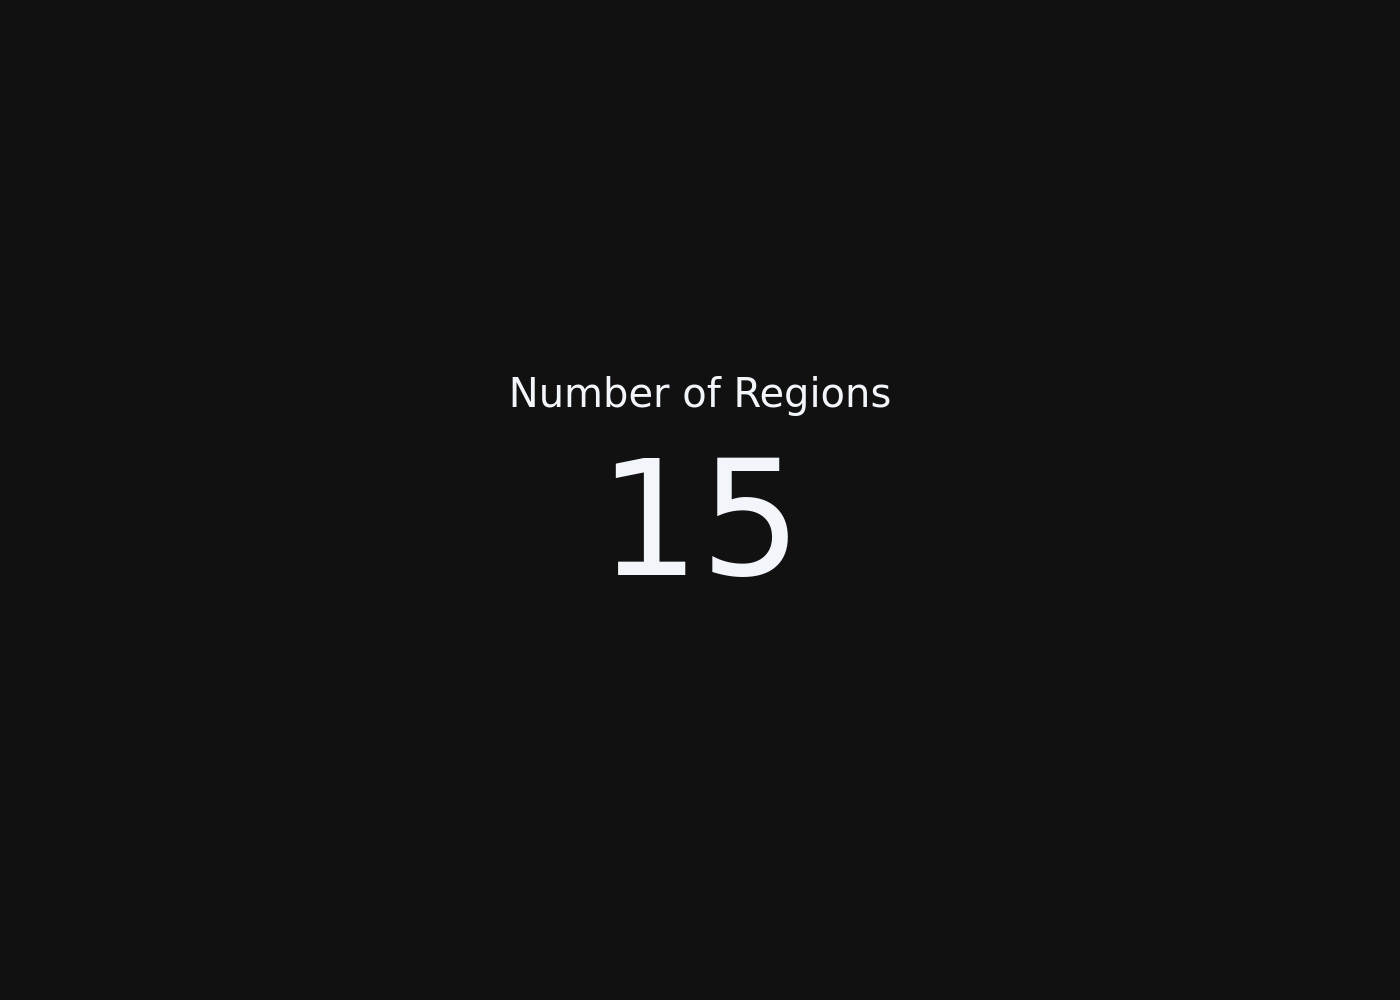

('SELECT COUNT(DISTINCT Survey_Location) AS RegionCount FROM survey_data',
    RegionCount
 0           15,
 Figure({
     'data': [{'mode': 'number', 'title': {'text': 'Number of Regions'}, 'type': 'indicator', 'value': 15}],
     'layout': {'template': '...'}
 }))

In [11]:
vn.ask(question="How many regions we have")

## Launch the User Interface


In [12]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn, allow_llm_to_see_data=True)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 802.25 tokens (approx)
Using model gpt-4o for 90.0 tokens (approx)


Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 802.5 tokens (approx)
Using model gpt-4o for 1183.0 tokens (approx)


Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 806.75 tokens (approx)
Using model gpt-4o for 1187.25 tokens (approx)


Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 807.0 tokens (approx)


Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 968.75 tokens (approx)
Using model gpt-4o for 147.5 tokens (approx)


Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 805.75 tokens (approx)
Using model gpt-4o for 1186.25 tokens (approx)


Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 807.5 tokens (approx)
Using model gpt-4o for 96.75 tokens (approx)


Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 815.5 tokens (approx)
Using model gpt-4o for 104.75 tokens (approx)


Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 804.5 tokens (approx)
Using model gpt-4o for 141616.25 tokens (approx)


Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 809.5 tokens (approx)


Number of requested results 10 is greater than number of elements in index 4, updating n_results = 4
Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1
Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


Using model gpt-4o for 1067.5 tokens (approx)


## Next Steps
Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the 
- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
